In [2]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

%matplotlib inline

cinta = pd.read_excel('Cinta.xlsx', sheet_name='RECIBOSD')


In [127]:
cinta

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO
0,18,123,2,FFULL,2019-01-03,2019-01-17,123.0
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0
2,18,123,3,FFULL,2019-02-03,2019-02-17,123.0
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8


### Se clasifica si el recibo es nuevo o viejo segun la fecha (se puede tomar otras opciones o traer de la base)

In [128]:
cinta['FACTURACION'] = cinta.apply(lambda x: 'OLD' if x.FENVIO - x.FEMISION > np.timedelta64(30, 'D') else 'NUEVO', axis = 1)
cinta['MENVIO'] = cinta.FENVIO.apply(lambda x:x.strftime('%B'))
cinta.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,FACTURACION,MENVIO
0,18,123,2,FFULL,2019-01-03,2019-01-17,123.0,NUEVO,January
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,OLD,February
2,18,123,3,FFULL,2019-02-03,2019-02-17,123.0,NUEVO,February
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,NUEVO,February
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,NUEVO,February


## Utilizando GroupBy

In [131]:
cosecha2 = cinta.groupby(['PRODUCTO', 'FACTURACION', 'MENVIO'])['MONTO'].\
    agg(['sum', 'count']).\
    rename(columns = {'sum':'MONTO', 'count': 'CANTIDAD'})
cosecha2.head()

MONTO  CANTIDAD
PRODUCTO FACTURACION MENVIO                   
FFULL    NUEVO       February  623.0         2
                     January   123.0         1
         OLD         February  123.0         1
HOG      NUEVO       February   12.8         1

In [132]:
cosecha2['MONTO'].unstack(level=[0,1])

PRODUCTO     FFULL          HOG
FACTURACION  NUEVO    OLD NUEVO
MENVIO                         
February     623.0  123.0  12.8
January      123.0    NaN   NaN

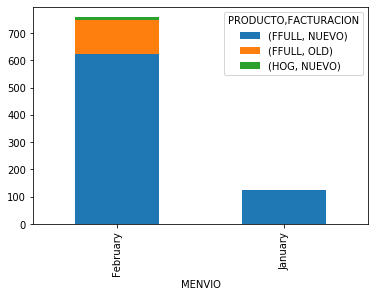

In [133]:
cosecha2['MONTO'].unstack(level=[0,1]).plot(kind = 'bar', stacked = True)

In [134]:
cosecha2['CANTIDAD'].unstack(level=[0,1])

PRODUCTO    FFULL        HOG
FACTURACION NUEVO  OLD NUEVO
MENVIO                      
February      2.0  1.0   1.0
January       1.0  NaN   NaN

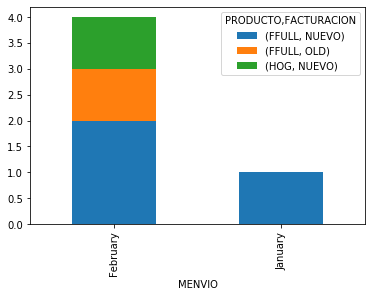

In [135]:
cosecha2['CANTIDAD'].unstack(level=[0,1]).plot(kind = 'bar', stacked = True)

## Utillizando Pivot Table

In [136]:
cinta.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,FACTURACION,MENVIO
0,18,123,2,FFULL,2019-01-03,2019-01-17,123.0,NUEVO,January
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,OLD,February
2,18,123,3,FFULL,2019-02-03,2019-02-17,123.0,NUEVO,February
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,NUEVO,February
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,NUEVO,February


In [137]:
pt = cinta.pivot_table(values = ['MONTO'], index = 'MENVIO', columns = ['PRODUCTO', 'FACTURACION'], aggfunc='sum')
pt

MONTO             
PRODUCTO     FFULL          HOG
FACTURACION  NUEVO    OLD NUEVO
MENVIO                         
February     623.0  123.0  12.8
January      123.0    NaN   NaN

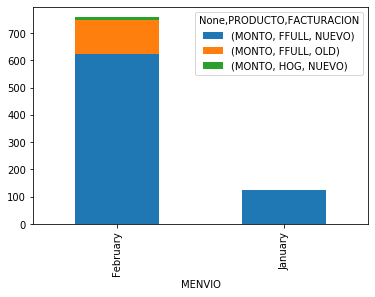

In [138]:
pt.plot(kind = 'bar', stacked = True)

In [143]:
pt.stack(level = [1,2]).unstack(level = 0).head()

MONTO        
MENVIO               February January
PRODUCTO FACTURACION                 
FFULL    NUEVO          623.0   123.0
         OLD            123.0     NaN
HOG      NUEVO           12.8     NaN

## Facturacion

In [4]:
recibos = pd.read_excel('Cinta.xlsx', sheet_name='RECIBOS')
recibos.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,STATUS
0,18,111,2,FFULL,2019-01-04,2019-02-17,1000.0,COBRADO
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,PEND
2,18,123,3,FFULL,2019-02-03,2019-02-17,444.0,COBRADO
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,COBRADO
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,PEND


In [5]:
recibos['MEMISOIN'] = recibos.FEMISION.apply(lambda x:x.strftime('%Y%m'))

In [6]:
recibos.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,STATUS,MEMISOIN
0,18,111,2,FFULL,2019-01-04,2019-02-17,1000.0,COBRADO,201901
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,PEND,201901
2,18,123,3,FFULL,2019-02-03,2019-02-17,444.0,COBRADO,201902
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,COBRADO,201902
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,PEND,201902


In [7]:
ptr = recibos.pivot_table(values = ['MONTO'], index = 'MEMISOIN', columns = ['STATUS'], aggfunc='sum')
ptr

MONTO       
STATUS   COBRADO   PEND
MEMISOIN               
201901    1000.0  123.0
201902     944.0   12.8

In [8]:
ptr['TOTAL'] = ptr.apply(sum, axis = 1)

In [9]:
ptr

MONTO          TOTAL
STATUS   COBRADO   PEND        
MEMISOIN                       
201901    1000.0  123.0  1123.0
201902     944.0   12.8   956.8

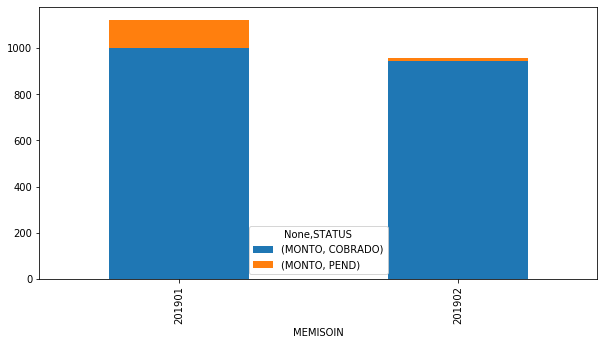

In [10]:
ptr.loc[:,:'MONTO'].plot(kind = 'bar', stacked = True, figsize = (10,5))

In [11]:
recibos.pivot_table(values = ['MONTO'], index = 'MEMISOIN', columns = ['STATUS', 'PRODUCTO'], aggfunc='sum')

MONTO             
STATUS   COBRADO   PEND      
PRODUCTO   FFULL  FFULL   HOG
MEMISOIN                     
201901    1000.0  123.0   NaN
201902     944.0    NaN  12.8

## Operaciones de recibos

In [12]:
operecibos = pd.read_excel('Cinta.xlsx', sheet_name='OPEREC')
operecibos.head()

,FECHA,RAMO,CERT,OPE,FEMIREC,MONTO
0,2019-01-01,1,1,EMI,2019-01-01,1000
1,2019-01-02,18,2,COB,2019-12-12,1000
2,2019-01-15,32,3,ANU,2019-12-30,950
3,2019-02-03,18,4,EMI,2019-02-03,1000
4,2019-02-10,1,5,COB,2019-01-05,900


In [86]:
rowcount = 10000
startDate = pd.to_datetime('2018-01-01')
elapsed = 365

operecibos = pd.DataFrame({ 'FECHA': [startDate + timedelta(np.random.randint(1, elapsed)) for i in range(rowcount)],
                        'MONTO': np.random.randint(180,300, size = (rowcount,)),
                        'OPE': np.random.choice(a = ['EMI', 'COB', 'ANU'], size = rowcount, p = [0.5, 0.45, 0.05]),
                        'PROD': np.random.choice(a = ['FFULL', 'HOG', 'ACPC01'], size = rowcount, p = [0.60, 0.05, 0.35]) 
                      })
operecibos['FCORTE'] = operecibos.FECHA.\
    apply(lambda f: f.strftime("%Y%m") if f.day < 17 else (f + pd.DateOffset(months = 1)).strftime("%Y%m"))
operecibos['CONT'] = np.ones(operecibos.shape[0])
operecibos.sort_index()

,FECHA,MONTO,OPE,PROD,FCORTE,CONT
0,2018-01-05,218,COB,ACPC01,201801,1.0
1,2018-11-06,180,EMI,FFULL,201811,1.0
2,2018-04-20,298,COB,ACPC01,201805,1.0
3,2018-03-04,250,COB,FFULL,201803,1.0
4,2018-04-14,299,EMI,FFULL,201804,1.0
...,...,...,...,...,...,...
9995,2018-06-09,221,COB,HOG,201806,1.0
9996,2018-08-26,266,EMI,FFULL,201809,1.0
9997,2018-04-21,269,COB,FFULL,201805,1.0
9998,2018-04-01,234,EMI,FFULL,201804,1.0


In [87]:
operecibos['MNT'] = operecibos.apply(\
                        lambda x: x.MONTO if x.OPE == 'EMI' else -x.MONTO, \
                        axis = 1)

In [88]:
operecibos.head()

,FECHA,MONTO,OPE,PROD,FCORTE,CONT,MNT
0,2018-01-05,218,COB,ACPC01,201801,1.0,-218
1,2018-11-06,180,EMI,FFULL,201811,1.0,180
2,2018-04-20,298,COB,ACPC01,201805,1.0,-298
3,2018-03-04,250,COB,FFULL,201803,1.0,-250
4,2018-04-14,299,EMI,FFULL,201804,1.0,299


In [89]:
operecibos.pivot_table(values = 'MNT', \
                       index = pd.Grouper(key = 'FECHA', freq = '1M'), \
                       columns = ['OPE'], aggfunc='sum')

OPE,ANU,COB,EMI
FECHA,,,
2018-01-31,-11584,-95823,93517
2018-02-28,-6537,-79741,83542
2018-03-31,-10190,-89683,98827
2018-04-30,-7791,-89832,96566
2018-05-31,-10698,-95221,99756
2018-06-30,-9995,-102817,106222
2018-07-31,-9502,-82950,105416
2018-08-31,-12443,-89431,99323
2018-09-30,-8568,-93740,100794


In [90]:
pd.DataFrame(operecibos.set_index('FECHA').resample('1M')['MNT'].sum())\
    .style.background_gradient(cmap='Blues')

,MNT
FECHA,
2018-01-31 00:00:00,-13890
2018-02-28 00:00:00,-2736
2018-03-31 00:00:00,-1046
2018-04-30 00:00:00,-1057
2018-05-31 00:00:00,-6163
2018-06-30 00:00:00,-6590
2018-07-31 00:00:00,12964
2018-08-31 00:00:00,-2551
2018-09-30 00:00:00,-1514


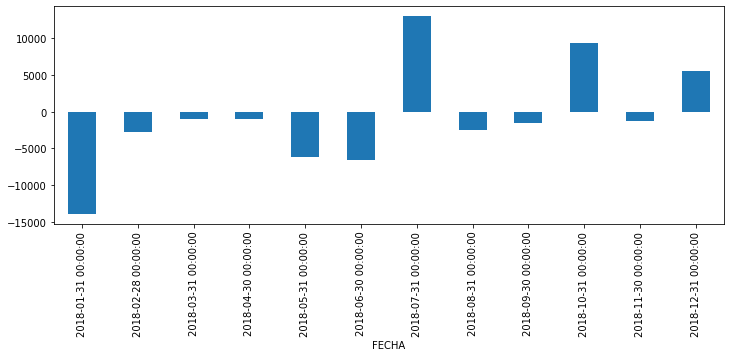

In [91]:
operecibos.set_index('FECHA').resample('1M')['MNT'].sum().plot(kind = 'bar', figsize = (12,4))

In [92]:
operecibos.set_index('FCORTE').iloc[:10,:]

,FECHA,MONTO,OPE,PROD,CONT,MNT
FCORTE,,,,,,
201801,2018-01-05,218,COB,ACPC01,1.0,-218
201811,2018-11-06,180,EMI,FFULL,1.0,180
201805,2018-04-20,298,COB,ACPC01,1.0,-298
201803,2018-03-04,250,COB,FFULL,1.0,-250
201804,2018-04-14,299,EMI,FFULL,1.0,299
201805,2018-04-30,274,EMI,FFULL,1.0,274
201809,2018-08-19,195,COB,FFULL,1.0,-195
201805,2018-05-04,186,EMI,ACPC01,1.0,186
201807,2018-06-25,283,COB,FFULL,1.0,-283


In [93]:
frame = operecibos.pivot_table(values = 'MNT', \
                       index = pd.Grouper(key = 'FECHA', freq = '1M'), \
                       columns = ['OPE'], aggfunc='sum')
frame.head()

OPE,ANU,COB,EMI
FECHA,,,
2018-01-31,-11584,-95823,93517
2018-02-28,-6537,-79741,83542
2018-03-31,-10190,-89683,98827
2018-04-30,-7791,-89832,96566
2018-05-31,-10698,-95221,99756


In [104]:
operecibos.rolling(10, on = 'FECHA').mean()

,FECHA,MONTO,CONT,MNT
0,2018-01-05,NaN,NaN,NaN
1,2018-11-06,NaN,NaN,NaN
2,2018-04-20,NaN,NaN,NaN
3,2018-03-04,NaN,NaN,NaN
4,2018-04-14,NaN,NaN,NaN
...,...,...,...,...
9995,2018-06-09,219.0,1.0,-33.6
9996,2018-08-26,226.3,1.0,12.3
9997,2018-04-21,234.3,1.0,4.3
9998,2018-04-01,228.2,1.0,-1.8


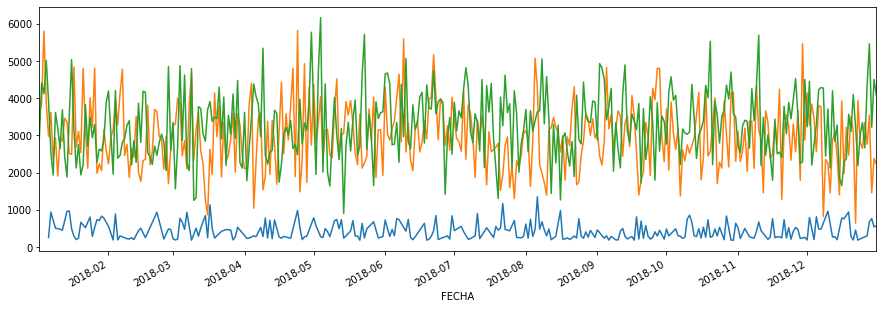

In [110]:
(operecibos[operecibos.OPE == 'ANU'].groupby('FECHA').sum()['MNT']*(-1)).plot(figsize = (15,5))
(operecibos[operecibos.OPE == 'COB'].groupby('FECHA').sum()['MNT']*(-1)).plot(figsize = (15,5))
operecibos[operecibos.OPE == 'EMI'].groupby('FECHA').sum()['MNT'].plot(figsize = (15,5))

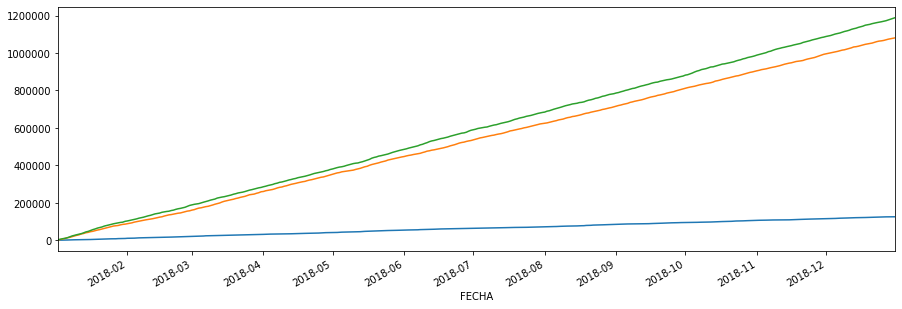

In [73]:
(operecibos[operecibos.OPE == 'ANU'].groupby('FECHA').sum()['MNT']*(-1)).cumsum().plot(figsize = (15,5))
(operecibos[operecibos.OPE == 'COB'].groupby('FECHA').sum()['MNT']*(-1)).cumsum().plot(figsize = (15,5))
operecibos[operecibos.OPE == 'EMI'].groupby('FECHA').sum()['MNT'].cumsum().plot(figsize = (15,5))


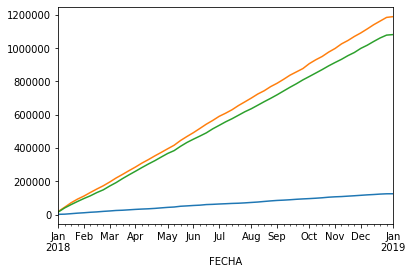

In [68]:
(operecibos[operecibos.OPE == 'ANU'].groupby(pd.Grouper(key = 'FECHA', freq = '1W')).sum()['MNT']*(-1)).cumsum().plot()
operecibos[operecibos.OPE == 'EMI'].groupby(pd.Grouper(key = 'FECHA', freq = '1W')).sum()['MNT'].cumsum().plot()
(operecibos[operecibos.OPE == 'COB'].groupby(pd.Grouper(key = 'FECHA', freq = '1W')).sum()['MNT']*(-1)).cumsum().plot()

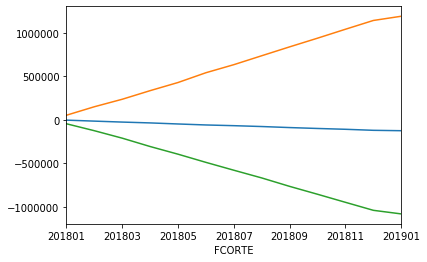

In [69]:
operecibos[operecibos.OPE == 'ANU'].set_index('FCORTE').groupby('FCORTE').sum()['MNT'].cumsum().plot()
operecibos[operecibos.OPE == 'EMI'].set_index('FCORTE').groupby('FCORTE').sum()['MNT'].cumsum().plot()
operecibos[operecibos.OPE == 'COB'].set_index('FCORTE').groupby('FCORTE').sum()['MNT'].cumsum().plot()

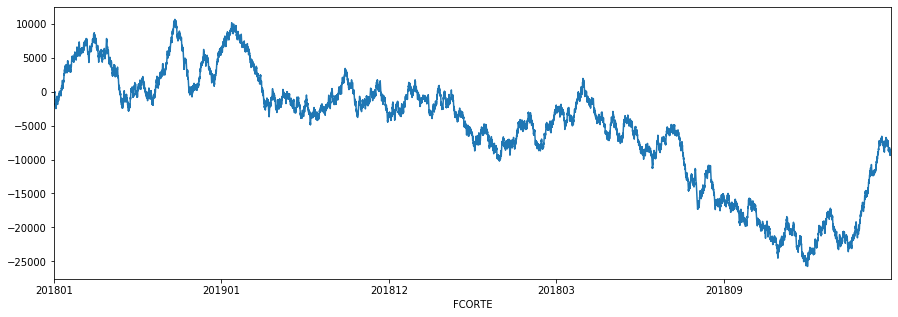

In [111]:
operecibos.set_index('FCORTE').MNT.cumsum().plot(figsize = (15,5))

In [112]:
frame.head().style.background_gradient(cmap='Blues', subset = ['ANU'])\
                    .applymap(lambda v: 'color: red' if v < 0 else 'color black')\
                    .format("${:20,.0f}", subset = ['EMI'])

OPE,ANU,COB,EMI
FECHA,,,
2018-01-31 00:00:00,-11584,-95823,"$ 93,517"
2018-02-28 00:00:00,-6537,-79741,"$ 83,542"
2018-03-31 00:00:00,-10190,-89683,"$ 98,827"
2018-04-30 00:00:00,-7791,-89832,"$ 96,566"
2018-05-31 00:00:00,-10698,-95221,"$ 99,756"
